In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'F:\Bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Attributes
age - Numerical Variable - Customers' Age

job - Categorical Variable - Customer's Job Type - ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital - Categorical Variable - Customer's Marital Status - ('divorced','married','single')

education - Categorical Variable - Customer's Education Level .('primary','secondary','tertiary','unknown')

default - Categorical Variable - Customer's credit default status (binary : yes/ no)

balance - Numerical Variable - Customer's average yearly balance in Euros (numeric)

housing - Categorical Variable - Customer's housing loan status ('no','yes')

loan - Categorical Variable - Customer's housing personal loan status loan? ( 'no','yes')

contact - Categorical Variable - Customer's preferbale communication mode ( 'cellular','telephone')

day - Numerical Variable - last contact day of the month

month - Numerical Variable - last contact month of year

duration - Numerical Variable - last call duration, in seconds

campaign - Numerical Variable - number of calls performed during the campaign

pdays - Numerical Variable - number of days that passed by after the client was last contacted from a previous campaign

previous - Numerical Variable - number of calls performed before this campaign and for this client

poutcome - Categorical Variable - outcome of the previous marketing campaign ( 'failure','nonexistent','success'))



target - deposit - Binary Variable - has the client subscribed a bank deposit? (binary: "yes","no")

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]= pd.Categorical(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), int64(7)
memory usage: 721.3 KB


Preliminary EDA , Descriptive Statistics and Data Wrangling with Target Variable

In [9]:
##Data Cleaning
df.pdays = df.pdays.abs() # since pdays has too much data with -1 value which seems to be input error.
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,52.821896,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.041696,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

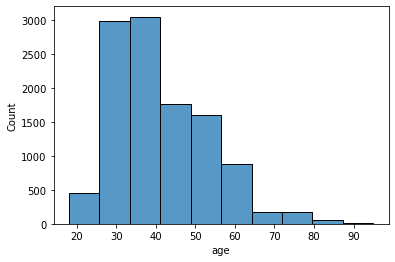

In [10]:
sns.histplot(df['age'],bins=10)

<AxesSubplot:xlabel='job', ylabel='count'>

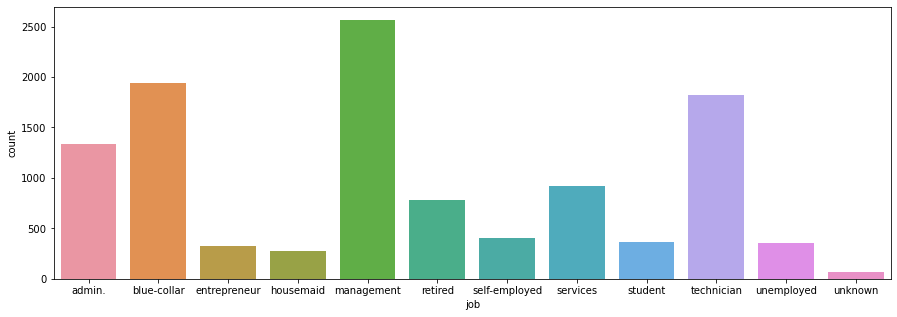

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

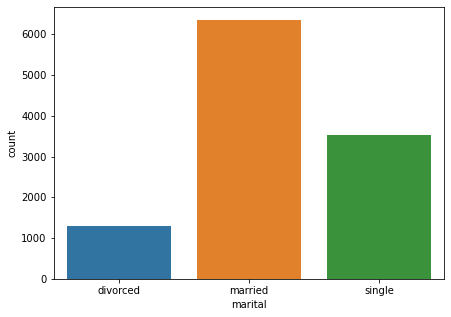

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x='marital',data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

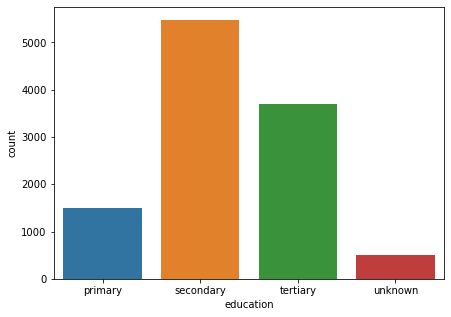

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x='education',data=df)

<AxesSubplot:xlabel='housing', ylabel='count'>

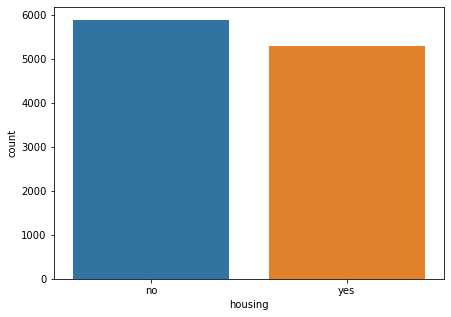

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='housing',data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

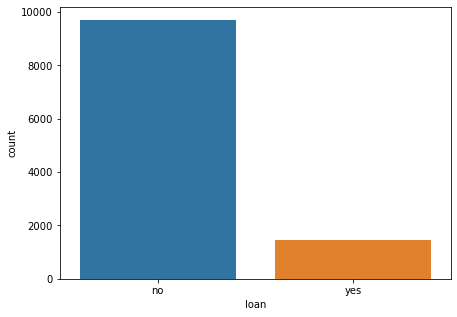

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan',data=df)

<AxesSubplot:xlabel='contact', ylabel='count'>

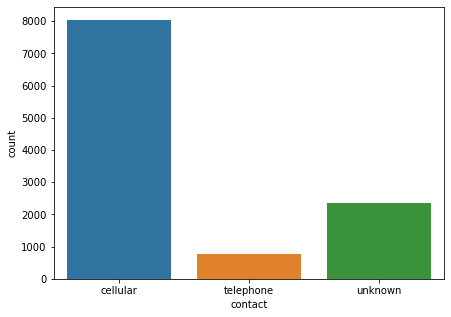

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='contact',data=df)

<AxesSubplot:xlabel='default', ylabel='count'>

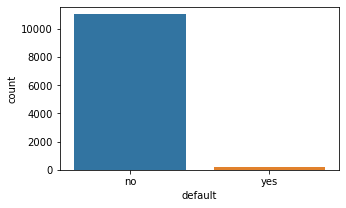

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x='default',data=df)

<AxesSubplot:xlabel='month', ylabel='Count'>

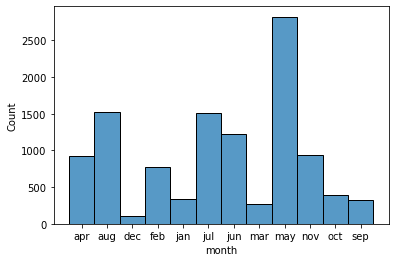

In [18]:
sns.histplot(df['month'])

<AxesSubplot:xlabel='duration', ylabel='Count'>

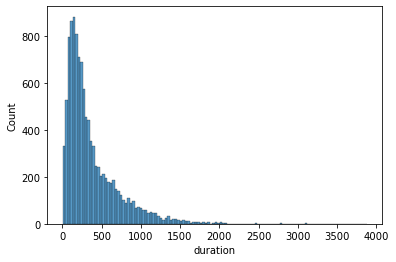

In [19]:
sns.histplot(df['duration'])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

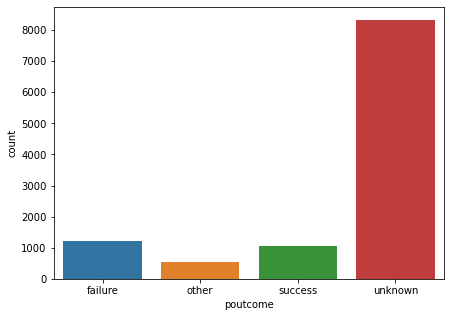

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='poutcome',data=df)

In [21]:
df.age.value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e51a066d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1e51a077460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e51a066a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e51a077b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e51a077e80>],
 'means': []}

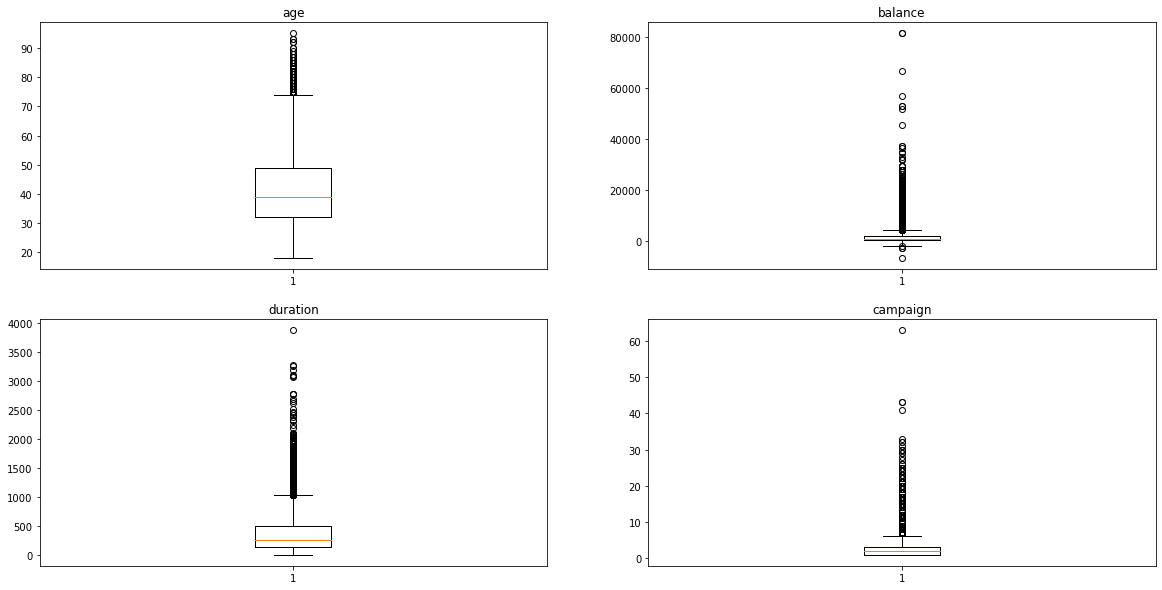

In [22]:
#checking for outliers
plt.figure(figsize=(20,10))
plt.subplot(2,2,1) 
plt.title('age')
plt.boxplot(df['age'])
plt.subplot(2,2,2)
plt.title('balance')
plt.boxplot(df['balance'])
plt.subplot(2,2,3) 
plt.title('duration')
plt.boxplot(df['duration'])
plt.subplot(2,2,4)
plt.title('campaign')
plt.boxplot(df['campaign'])

We see there are outliers in feature 'balance' which needs to be removed or imputed

In [23]:
# Missing values and categorical data treatment with convenient data for analysis

map_df= {"marital": {"single":0 ,"married":1,"divorced":2},
                "contact": {"unknown":0,"telephone":1,"cellular":2},
                "poutcome":{"other":-1,"unknown":0,"success":1,"failure":2},
                "month": {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                "default":{"yes":1, "no":0},
                "loan":{"yes":1, "no":0},
                "housing":{"yes":1, "no":0},
                "deposit": {"no":0,"yes":1}
                }
                
df1= df.replace(map_df)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1
2,41,technician,1,secondary,0,1270,1,0,0,5,5,1389,1,1,0,0,1
3,55,services,1,secondary,0,2476,1,0,0,5,5,579,1,1,0,0,1
4,54,admin.,1,tertiary,0,184,0,0,0,5,5,673,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,primary,0,1,1,0,2,20,4,257,1,1,0,0,0
11158,39,services,1,secondary,0,733,0,0,0,16,6,83,4,1,0,0,0
11159,32,technician,0,secondary,0,29,0,0,2,19,8,156,2,1,0,0,0
11160,43,technician,1,secondary,0,0,0,1,2,8,5,9,2,172,5,2,0


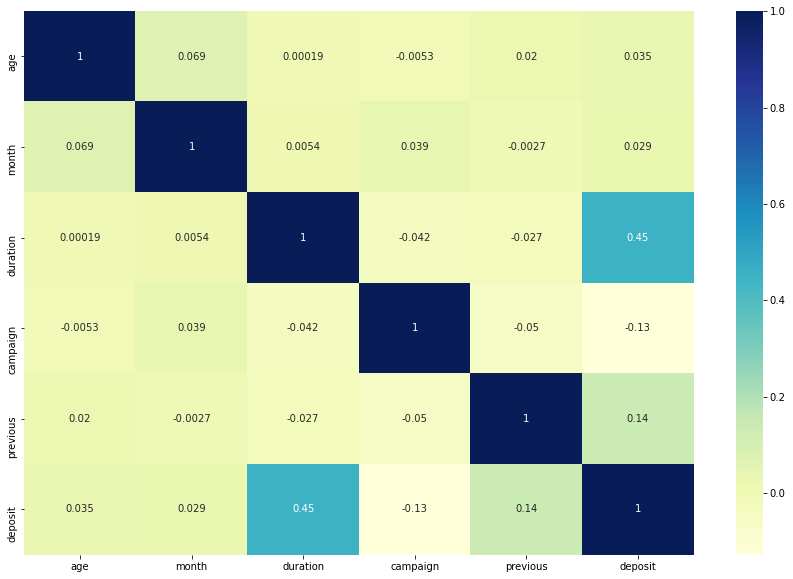

In [24]:
corr_df= df1[['age','month','duration','campaign','previous','deposit']].corr() #correlation amongst the variables
# figure size
plt.figure(figsize=(15,10))
# heatmap
sns.heatmap(corr_df , cmap="YlGnBu", annot=True)
plt.show()

In [25]:
from scipy.stats import zscore
df1['z_balance']=df1['balance']

In [26]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1,2343
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1,45
2,41,technician,1,secondary,0,1270,1,0,0,5,5,1389,1,1,0,0,1,1270
3,55,services,1,secondary,0,2476,1,0,0,5,5,579,1,1,0,0,1,2476
4,54,admin.,1,tertiary,0,184,0,0,0,5,5,673,2,1,0,0,1,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,primary,0,1,1,0,2,20,4,257,1,1,0,0,0,1
11158,39,services,1,secondary,0,733,0,0,0,16,6,83,4,1,0,0,0,733
11159,32,technician,0,secondary,0,29,0,0,2,19,8,156,2,1,0,0,0,29
11160,43,technician,1,secondary,0,0,0,1,2,8,5,9,2,172,5,2,0,0


In [27]:
df1['z_balance'] = zscore(df1['z_balance'])

In [28]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1,0.252525
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1,-0.459974
2,41,technician,1,secondary,0,1270,1,0,0,5,5,1389,1,1,0,0,1,-0.080160
3,55,services,1,secondary,0,2476,1,0,0,5,5,579,1,1,0,0,1,0.293762
4,54,admin.,1,tertiary,0,184,0,0,0,5,5,673,2,1,0,0,1,-0.416876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,primary,0,1,1,0,2,20,4,257,1,1,0,0,0,-0.473616
11158,39,services,1,secondary,0,733,0,0,0,16,6,83,4,1,0,0,0,-0.246658
11159,32,technician,0,secondary,0,29,0,0,2,19,8,156,2,1,0,0,0,-0.464934
11160,43,technician,1,secondary,0,0,0,1,2,8,5,9,2,172,5,2,0,-0.473926


In [29]:
df1=df1.drop(df1[(df1['z_balance']>3)|(df1['z_balance']<-3)].index, axis=0, inplace=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e51b7ceaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e51b7db1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e51b7ce790>],
 'medians': [<matplotlib.lines.Line2D at 0x1e51b7db8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e51b7dbc10>],
 'means': []}

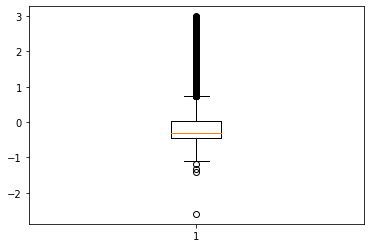

In [30]:
plt.boxplot(df1['z_balance'])

In [31]:
df1_job= pd.get_dummies(df1['job'], prefix='job', drop_first=True)
df1= pd.concat([df1,df1_job],axis=1)
df1_edu= pd.get_dummies(df1['education'], prefix= 'education', drop_first= True)
df1= pd.concat([df1,df1_edu],axis=1)
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,admin.,1,secondary,0,2343,1,0,0,5,...,0,0,0,0,0,0,0,1,0,0
1,56,admin.,1,secondary,0,45,0,0,0,5,...,0,0,0,0,0,0,0,1,0,0
2,41,technician,1,secondary,0,1270,1,0,0,5,...,0,0,0,0,1,0,0,1,0,0
3,55,services,1,secondary,0,2476,1,0,0,5,...,0,0,1,0,0,0,0,1,0,0
4,54,admin.,1,tertiary,0,184,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
5,42,management,0,tertiary,0,0,1,1,0,5,...,0,0,0,0,0,0,0,0,1,0
6,56,management,1,tertiary,0,830,1,1,0,6,...,0,0,0,0,0,0,0,0,1,0
7,60,retired,2,secondary,0,545,1,0,0,6,...,1,0,0,0,0,0,0,1,0,0
8,37,technician,1,secondary,0,1,1,0,0,6,...,0,0,0,0,1,0,0,1,0,0
9,28,services,0,secondary,0,5090,1,0,0,6,...,0,0,1,0,0,0,0,1,0,0


In [32]:
df1= df1.drop(['job','education'],axis=1)
df1.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,1,0,2343,1,0,0,5,5,1042,...,0,0,0,0,0,0,0,1,0,0
1,56,1,0,45,0,0,0,5,5,1467,...,0,0,0,0,0,0,0,1,0,0
2,41,1,0,1270,1,0,0,5,5,1389,...,0,0,0,0,1,0,0,1,0,0
3,55,1,0,2476,1,0,0,5,5,579,...,0,0,1,0,0,0,0,1,0,0
4,54,1,0,184,0,0,0,5,5,673,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X = df1.drop(['deposit'], axis=1)
y= df1['deposit']

In [34]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size = 0.30 , random_state= 100)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
#LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred=classifier.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

79.25386715195633

In [39]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1429,  327],
       [ 357, 1184]], dtype=int64)

<AxesSubplot:>

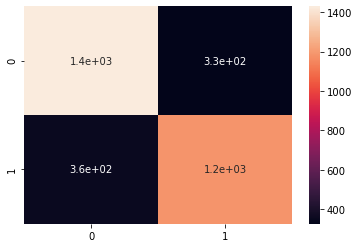

In [40]:
sns.heatmap(cm, annot= True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1756
           1       0.78      0.77      0.78      1541

    accuracy                           0.79      3297
   macro avg       0.79      0.79      0.79      3297
weighted avg       0.79      0.79      0.79      3297



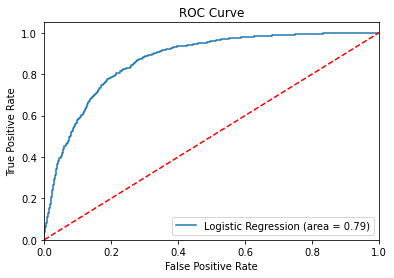

Logistic Regression AUC Score: 0.8687222745340348


In [42]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
auc_score = metrics.roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print("Logistic Regression AUC Score:",auc_score)

In [43]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier() 
classifier_dt.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)*100

78.52593266606004

In [45]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1386,  370],
       [ 338, 1203]], dtype=int64)

<AxesSubplot:>

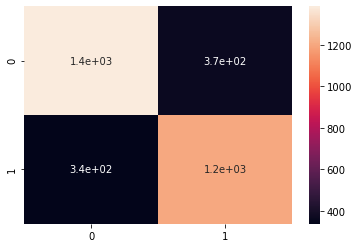

In [46]:
sns.heatmap(cm, annot= True)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1756
           1       0.76      0.78      0.77      1541

    accuracy                           0.79      3297
   macro avg       0.78      0.78      0.78      3297
weighted avg       0.79      0.79      0.79      3297



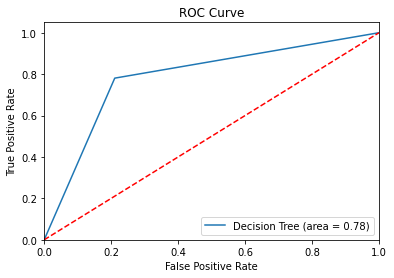

Decision Regression AUC Score: 0.7849778787551793


In [48]:
dec_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Decision_Tree_ROC')
plt.show()
auc_score = metrics.roc_auc_score(y_test, classifier_dt.predict_proba(X_test)[:,1])
print("Decision Regression AUC Score:",auc_score)

In [49]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier() 
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred)*100
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1429,  327],
       [ 181, 1360]], dtype=int64)

<AxesSubplot:>

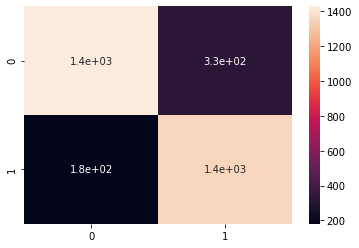

In [51]:
sns.heatmap(cm, annot= True)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1756
           1       0.81      0.88      0.84      1541

    accuracy                           0.85      3297
   macro avg       0.85      0.85      0.85      3297
weighted avg       0.85      0.85      0.85      3297



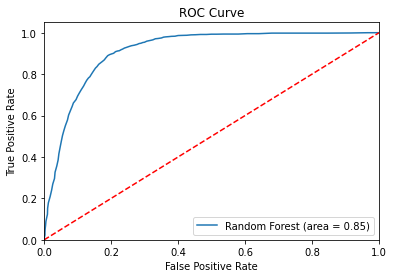

Random Forest AUC Score: 0.9119169060116866


In [53]:
dec_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()
auc_score = metrics.roc_auc_score(y_test, classifier_rf.predict_proba(X_test)[:,1])
print("Random Forest AUC Score:",auc_score)

In [54]:
##XGBOOST
from xgboost import XGBClassifier
classifier_xg = XGBClassifier() 
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)*100

86.16924476797088

In [56]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1485,  271],
       [ 185, 1356]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1756
           1       0.83      0.88      0.86      1541

    accuracy                           0.86      3297
   macro avg       0.86      0.86      0.86      3297
weighted avg       0.86      0.86      0.86      3297



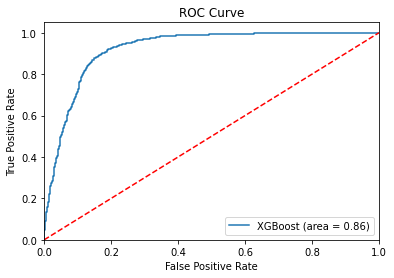

XGBoost AUC Score: 0.9218073493087203


In [58]:
dec_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_xg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()
auc_score = metrics.roc_auc_score(y_test, classifier_xg.predict_proba(X_test)[:,1])
print("XGBoost AUC Score:",auc_score)